In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [43]:
%pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:0000:0100:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/L

In [4]:
divvy_forecast = pd.read_csv('divvy_update.csv')

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_59192/3915955504.py:1: DtypeWarning: Columns (0,5,7,10,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  divvy_forecast = pd.read_csv('divvy_update.csv')


In [5]:
divvy_forecast.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,...,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type,DATE
0,8546790,2015-12-31 17:35:00,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,...,31,2015,1735,12,31,2015,1744,24.0,Weekday,2015-12-31
1,8546793,2015-12-31 17:37:00,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,...,31,2015,1737,12,31,2015,1741,23.0,Weekday,2015-12-31
2,8546795,2015-12-31 17:37:00,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,...,31,2015,1737,12,31,2015,1740,28.0,Weekday,2015-12-31
3,8546797,2015-12-31 17:38:00,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,...,31,2015,1738,12,31,2015,1755,40.0,Weekday,2015-12-31
4,8546798,2015-12-31 17:38:00,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,...,31,2015,1738,12,31,2015,1741,25.0,Weekday,2015-12-31


In [6]:
divvy_forecast['START TIME'] = pd.to_datetime(divvy_forecast['START TIME'])

In [44]:
divvy_forecast.reset_index(inplace=True)

In [46]:
divvy_forecast.set_index('START TIME', inplace=True)

In [48]:
divvy_forecast.head()

,TRIP ID,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,...,Start Day,Start Year,Start Time,Stop Month,Stop Day,Stop Year,Stop Time,Rider Age,Day Type,DATE
START TIME,,,,,,,,,,,,,,,,,,,,,
2015-12-31 17:35:00,8546790,2015-12-31 17:44:00,979.0,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,...,31,2015,1735,12,31,2015,1744,24.0,Weekday,2015-12-31
2015-12-31 17:37:00,8546793,2015-12-31 17:41:00,1932.0,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,...,31,2015,1737,12,31,2015,1741,23.0,Weekday,2015-12-31
2015-12-31 17:37:00,8546795,2015-12-31 17:40:00,1693.0,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,...,31,2015,1737,12,31,2015,1740,28.0,Weekday,2015-12-31
2015-12-31 17:38:00,8546797,2015-12-31 17:55:00,3370.0,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,...,31,2015,1738,12,31,2015,1755,40.0,Weekday,2015-12-31
2015-12-31 17:38:00,8546798,2015-12-31 17:41:00,2563.0,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,...,31,2015,1738,12,31,2015,1741,25.0,Weekday,2015-12-31


In [49]:
monthly_forecast = divvy_forecast.resample('M').size()

In [66]:
monthly_forecast.head()

START TIME
2013-06-30      4005
2013-07-31     74867
2013-08-31    170508
2013-09-30    201030
2013-10-31    174695
Freq: M, dtype: int64

In [50]:
sarima_model = sm.tsa.statespace.SARIMAX(monthly_forecast,
                                         order=(1,1,1),
                                         seasonal_order=(1,1,1,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

results = sarima_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75900D+00    |proj g|=  7.12924D-01

At iterate    5    f=  9.65108D+00    |proj g|=  5.14900D-02

At iterate   10    f=  9.64908D+00    |proj g|=  5.76785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     19      1     0     0   9.288D-06   9.649D+00
  F =   9.6490605168022796     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [51]:
forecast = results.get_forecast(steps=12)
predicted_ridership = forecast.predicted_mean
predicted_conf_int = forecast.conf_int()

In [58]:
import matplotlib.dates as mdates

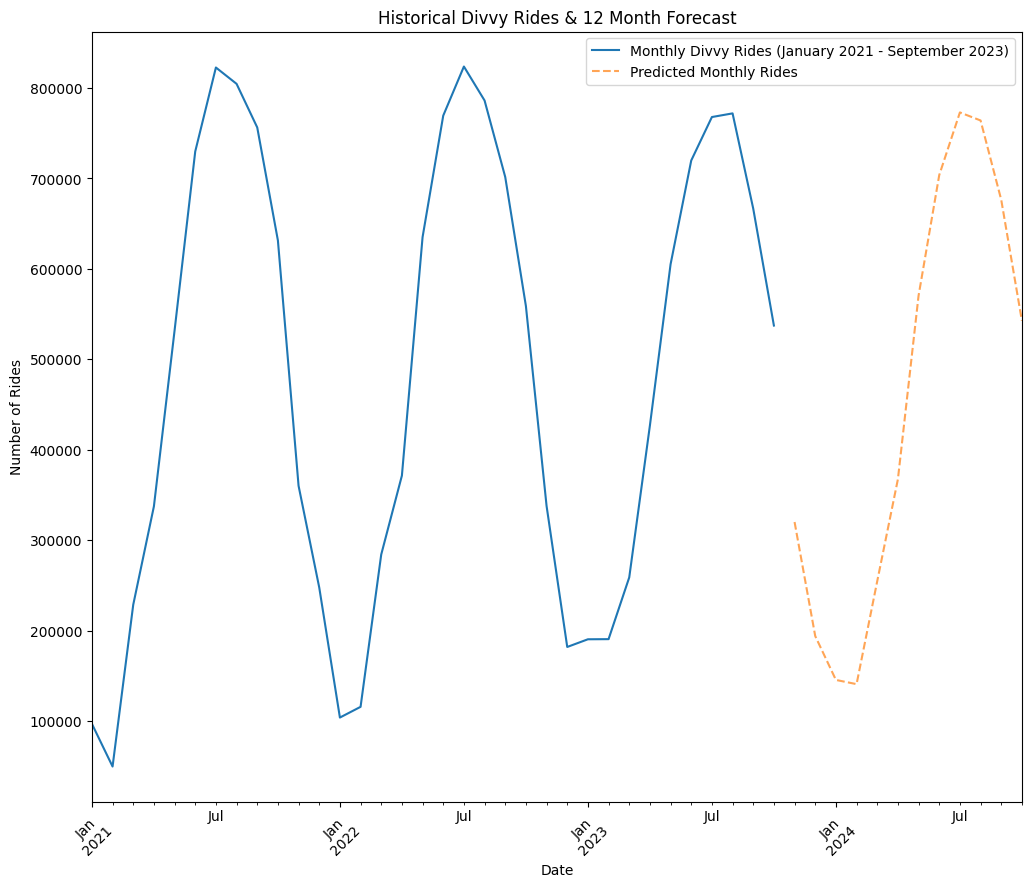

In [60]:
plt.figure(figsize=(12,10))
monthly_21_23 = monthly_forecast.loc['2021-01': '2023-10']

monthly_21_23.plot(label='Monthly Divvy Rides (January 2021 - September 2023)')

predicted_ridership.plot(label='Predicted Monthly Rides', alpha=0.7, linestyle='--')

plt.xticks(rotation=45)
plt.title('Historical Divvy Rides & 12 Month Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()


---
---
### In-Sample Prediction

In [67]:
model = SARIMAX(monthly_forecast, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10619D+01    |proj g|=  1.41296D-01

At iterate    5    f=  1.10392D+01    |proj g|=  5.08729D-03

At iterate   10    f=  1.10388D+01    |proj g|=  1.21229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   3.532D-06   1.104D+01
  F =   11.038794160517984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [70]:
monthly_forecast.index[:5]

DatetimeIndex(['2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30',
               '2013-10-31'],
              dtype='datetime64[ns]', name='START TIME', freq='M')

In [71]:
in_sample_pred = results.get_prediction(start=pd.to_datetime('2013-06-30'), dynamic=False)
in_sample_pred_conf_int = in_sample_pred.conf_int()

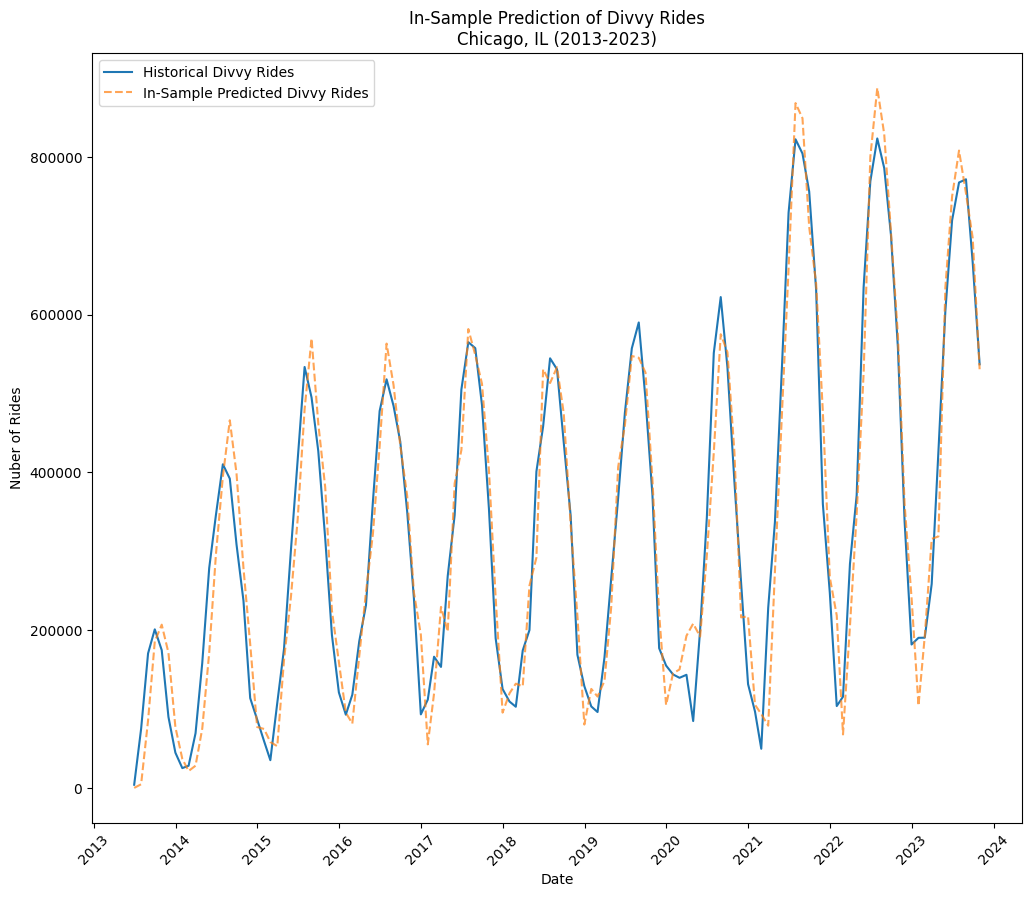

In [75]:
# Plot in-sample predictions
plt.figure(figsize=(12,10))

plt.plot(monthly_forecast, label = 'Historical Divvy Rides')
plt.plot(in_sample_pred.predicted_mean, label='In-Sample Predicted Divvy Rides', alpha=0.7, linestyle='--')

ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to each year
ax.xaxis.set_minor_locator(mdates.YearLocator())  # Set minor ticks to each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Major ticks format to show year only

plt.xticks(rotation=45)  # Rotate for better readability

plt.title("In-Sample Prediction of Divvy Rides\nChicago, IL (2013-2023)")
plt.xlabel("Date")
plt.ylabel("Nuber of Rides")
plt.legend()

plt.show()